### Import Libraries

In [21]:
import os
import numpy as np
import pandas as pd
import glob as gb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix

# import warnings
# warnings.filterwarnings("ignore")

In [22]:
from keras.datasets import mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [23]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### Visualize Examples

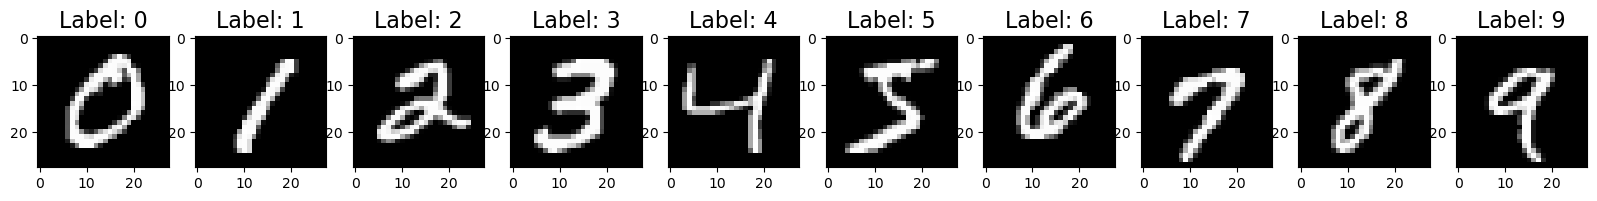

In [24]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [25]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [26]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [27]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


### Prepare Data

In [28]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [29]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


### Create Model - Fully Connected Neural Network

In [30]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Train

In [31]:
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 1s 5ms/step - loss: 0.5799 - accuracy: 0.8313
Epoch 2/10
118/118 [==============================] - 1s 5ms/step - loss: 0.2224 - accuracy: 0.9353
Epoch 3/10
118/118 [==============================] - 1s 5ms/step - loss: 0.1645 - accuracy: 0.9521
Epoch 4/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1317 - accuracy: 0.9618
Epoch 5/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1075 - accuracy: 0.9681
Epoch 6/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0923 - accuracy: 0.9723
Epoch 7/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0824 - accuracy: 0.9757
Epoch 8/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0693 - accuracy: 0.9789
Epoch 9/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0629 - accuracy: 0.9811
Epoch 10/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0542 - accuracy: 0.9834

### Evaluate

In [32]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 0s 668us/step - loss: 0.0746 - accuracy: 0.9768
Test Loss: 0.07456660270690918, Test Accuracy: 0.9768000245094299


In [33]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

[[1.3517773e-05 2.8406343e-05 1.6378851e-04 ... 9.9850070e-01
  3.7973352e-06 4.9305214e-05]
 [1.5304664e-06 5.1375013e-05 9.9984777e-01 ... 1.8747421e-09
  1.8121009e-05 1.6375805e-11]
 [3.9787474e-06 9.9880862e-01 9.0618414e-05 ... 1.9696209e-04
  8.6472406e-05 1.1988325e-05]
 ...
 [3.1950487e-10 2.8943999e-08 1.1778799e-09 ... 1.6984401e-06
  3.8529521e-07 2.1024392e-05]
 [1.7461613e-08 2.7794669e-09 2.5798541e-10 ... 1.2092122e-08
  8.2418352e-05 5.1212794e-09]
 [1.2836389e-07 2.0142676e-09 3.5508814e-09 ... 1.7502878e-11
  1.2539164e-09 1.1153458e-09]]
[7 2 1 ... 4 5 6]


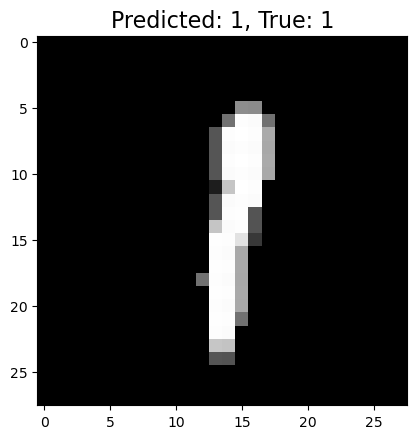

In [34]:
# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

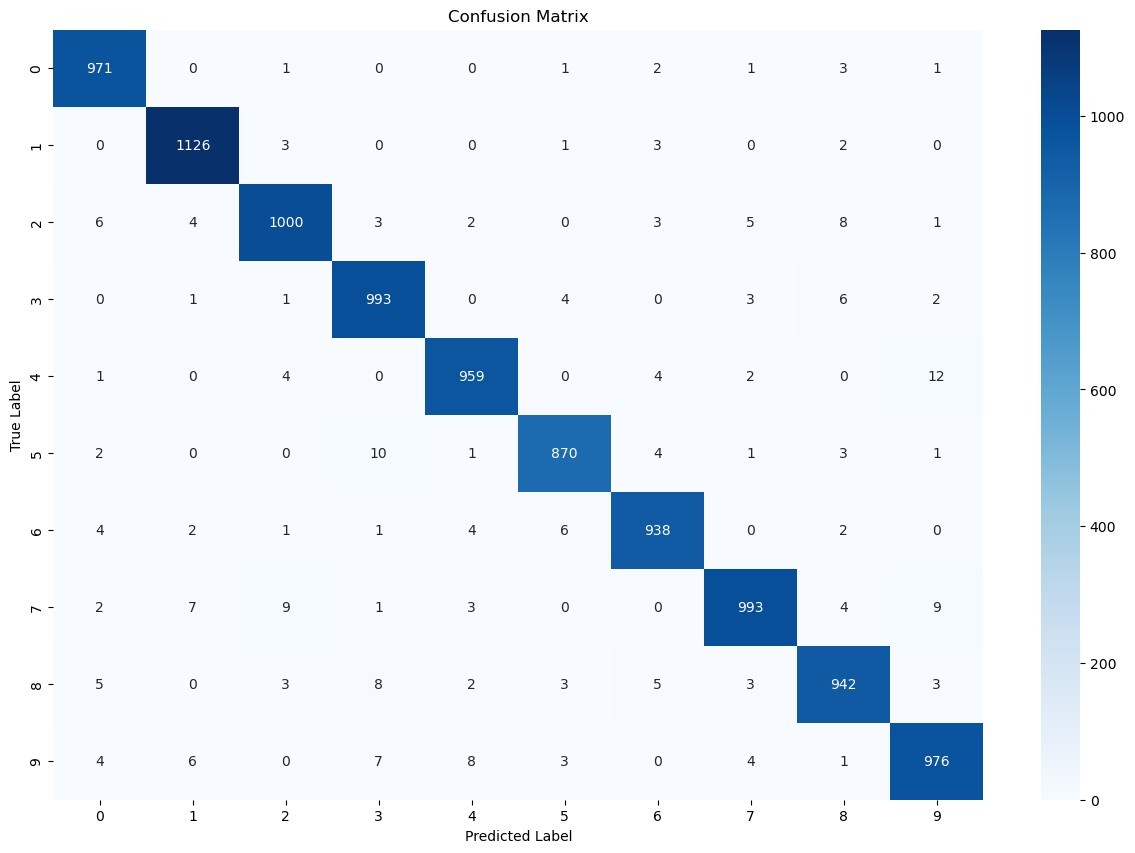

In [35]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

### Investigate Errors

In [36]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [37]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

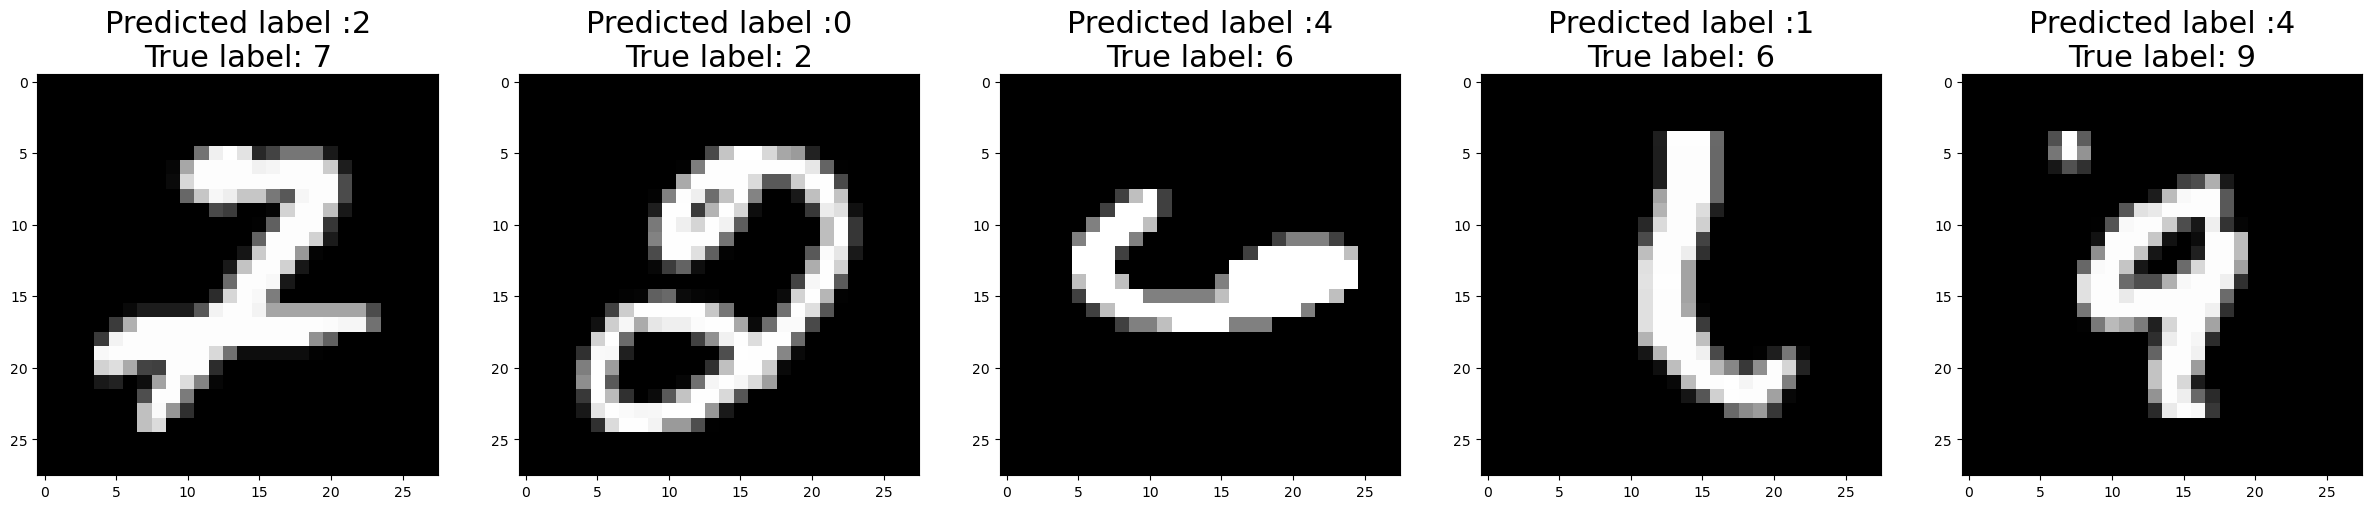

In [38]:
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)